In [143]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [144]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [100]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [101]:
df.shape

(1338, 7)

In [102]:
###Find the average score for age

<AxesSubplot:ylabel='age'>

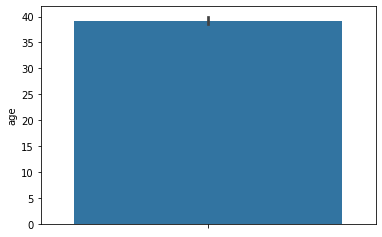

In [103]:
sns.barplot(y = df['age'], estimator=np.mean)

In [104]:
###Find the average score for BMI

<AxesSubplot:ylabel='bmi'>

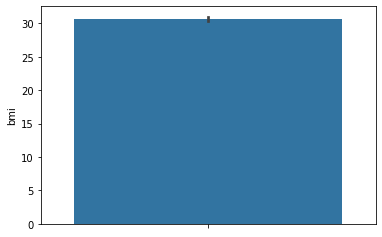

In [105]:
sns.barplot(y = df['bmi'], estimator=np.mean)

In [106]:
###Find the max number of children

<AxesSubplot:ylabel='children'>

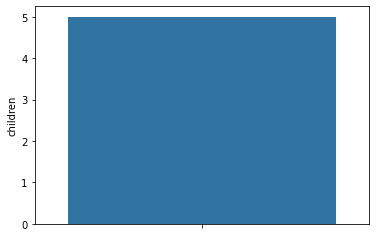

In [107]:
sns.barplot(y = df['children'], estimator=max)

In [108]:
###Find the average score for charges

<AxesSubplot:ylabel='charges'>

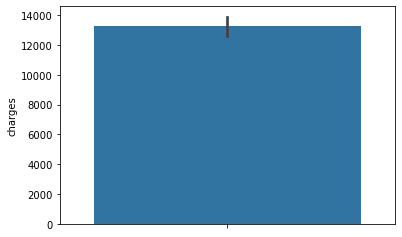

In [109]:
sns.barplot(y = df['charges'], estimator = np.mean)

In [110]:
###Determine if outliers are present in charges

C:\Users\MoBash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


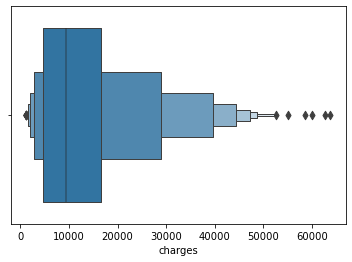

In [111]:
outliers = sns.boxenplot(df['charges'])

In [112]:
###Perform an explanatory analysis to determine the percentage of children

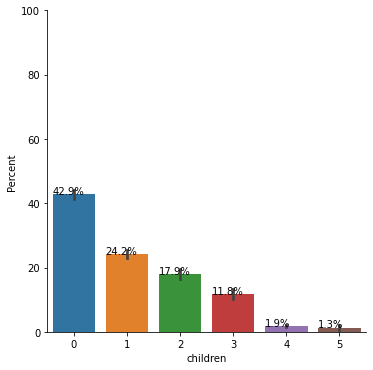

In [113]:
new_df = df.groupby('region')['children'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

df = sns.catplot(x='children', y='Percent', kind='bar', data=new_df)
df.ax.set_ylim(0,100)

for p in df.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    df.ax.text(txt_x,txt_y,txt)

In [114]:
###Show the distrubution of charges

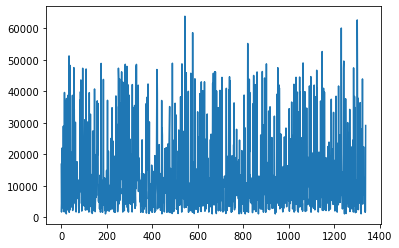

In [145]:
dist = plt.plot(df['charges'])
dist

In [ ]:
###Show the distrubution of bmi

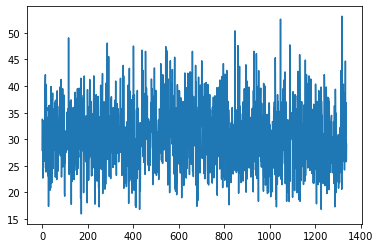

In [ ]:
plt.plot(df['bmi'])

In [ ]:
###Perform a predictive analysis to see if we successfully predict the cost of medical insurance using the following
##LinearRegression ##DecisionTreeRegressor ##RandomFroestRegressor
###Compare and contrast to pick which of the following attribute is suitable

In [119]:
df['charges'] = df['charges'].astype('int')

In [120]:
df = df.astype({'charges':'int'})
print(df.astype)

<bound method NDFrame.astype of       age     sex     bmi  children smoker     region  charges
0      19  female  27.900         0    yes  southwest    16884
1      18    male  33.770         1     no  southeast     1725
2      28    male  33.000         3     no  southeast     4449
3      33    male  22.705         0     no  northwest    21984
4      32    male  28.880         0     no  northwest     3866
...   ...     ...     ...       ...    ...        ...      ...
1333   50    male  30.970         3     no  northwest    10600
1334   18  female  31.920         0     no  northeast     2205
1335   18  female  36.850         0     no  southeast     1629
1336   21  female  25.800         0     no  southwest     2007
1337   61  female  29.070         0    yes  northwest    29141

[1338 rows x 7 columns]>


In [121]:
enc = LabelEncoder()
df['region'] = enc.fit_transform(df['region'])
df['smoker'] = enc.fit_transform(df['smoker'])
df['sex'] = enc.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884
1,18,1,33.770,1,0,2,1725
2,28,1,33.000,3,0,2,4449
3,33,1,22.705,0,0,1,21984
4,32,1,28.880,0,0,1,3866


In [122]:
X = df.drop('charges', axis = 1)
Y = df['charges']

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 1)

In [124]:
Model1 = LinearRegression()
Model1.fit(X_train,Y_train)

LinearRegression()

In [125]:
pred1 = Model1.predict(X_test)
pred1

array([ 4.50002329e+03,  1.28189908e+04,  1.23972430e+04,  1.34298827e+04,
        5.31257061e+02,  3.22638349e+04,  1.30758123e+04,  1.22343270e+04,
        3.82884043e+03,  3.01559841e+04,  1.13192872e+04,  1.72080169e+04,
        8.91786552e+03,  8.22831030e+03,  3.58119299e+03,  1.01914024e+04,
        3.97083902e+03,  6.75470261e+03,  1.52136632e+04,  1.42493061e+04,
        1.24179696e+04,  3.34492832e+04,  9.12365195e+03,  8.85329647e+03,
        3.13355885e+03,  8.14370567e+03,  9.33870727e+03,  1.10787940e+04,
        7.54481493e+03,  4.40488882e+03,  1.39108007e+04,  5.64837843e+03,
        3.46822872e+04,  2.74017556e+04,  3.38100230e+04,  9.52510904e+03,
        3.06082782e+04,  2.67062069e+04,  1.54108259e+04,  3.41393440e+04,
        6.63419896e+03,  1.39732230e+04,  1.08966749e+04,  1.47976063e+04,
        4.09688404e+03,  1.29618132e+04,  4.71551287e+03,  2.92766775e+04,
        7.31736132e+03,  1.39525176e+04,  1.35185995e+04,  1.20793579e+04,
        2.00213983e+03,  

In [126]:
Model1.score(X_test, Y_test)

0.7403660708714219

In [130]:
##Decision Tree Classifier

In [131]:
Model2 = DecisionTreeClassifier()
Model2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [132]:
pred2 = Model2.predict(X_test)
pred2

array([ 1137, 11735,  9174, 10977,  1980, 21472,  8703, 11658,  2721,
        3972, 12648, 10928,  7256,  5979,  1137,  8978,  5257,  6311,
       36910, 13457, 10435,  5138,  8232,  8457, 21344,  6393,  8604,
        8280,  5972,  2721, 12643, 14358, 22218, 36898, 24520, 10422,
       36197, 17085, 11848, 28340, 20177, 11735, 10702, 12333,  4934,
       12323,  4830, 36950,  9361, 14001, 12981, 11881,  2483,  7726,
       33732, 40419,  8522, 12638,  4564,  1146,  3171, 13143,  4133,
        2850, 12323,  8964, 10977, 12629,  2196, 15006, 23807, 37607,
        1744, 12475, 12950, 39556,  2639,  2866, 11837, 10106,  2585,
       12643, 11729,  2494, 22462, 37484,  5979,  8023,  9778,  6571,
       55135, 44641, 12928,  9249,  1627, 24476,  9855, 12643, 12231,
       24915, 11735,  2974,  5708, 36397, 27808, 18310,  1837,  7626,
        1629, 11840,  3972, 20177,  1705, 12485,  2639,  1256,  6059,
       14256, 24915,  1877,  8277, 10141,  5974,  9500, 12949,  8978,
       12044, 19719,

In [133]:
Model2.score(X_test, Y_test)

0.024875621890547265

In [135]:
## RandomForestClassifier

In [137]:
Model3 = RandomForestClassifier()
Model3.fit(X_train, Y_train)

RandomForestClassifier()

In [139]:
pred3 = Model3.predict(X_test)
pred3

array([ 1639, 10976,  9144, 11436,  1964, 20745,  8978, 11658,  2721,
       16577, 24513, 46113,  5584,  7337,  1137,  8027,  3866,  7151,
       14474, 13470, 10435,  5138,  7421,  8782, 21344,  6393,  6746,
        8280,  4934,  2721,  9872,  7726, 21659, 17352, 30942, 24476,
       36197, 19199, 11090, 43943,  2801, 10976, 10702, 12333,  4934,
       12323,  1725, 19350, 13415, 13430, 11743, 11881,  2045,  7151,
       11272,  5662, 30942, 12638,  4564,  1146,  3171, 13143, 17085,
        2850, 13143, 10461, 10600,  9855,  2719, 16115, 46130, 37701,
        1744, 12475, 13770, 39047,  2639,  1815, 11837,  7201,  2585,
       12643, 11305,  1972, 39047, 37484,  7623, 46113, 10043,  7209,
       21348, 21659, 11987,  7633,  1627, 27346,  7624, 11881, 12231,
        4719, 10976, 18310, 19199, 16297, 29330, 33907,  1744,  6849,
        2201, 11658,  3972,  3392,  1627, 30063,  2639,  1256,  6653,
       14256, 43753,  2257, 11837, 10407,  5478,  6250, 44260,  7196,
       13430, 17663,

In [142]:
Model3.score(X_test, Y_test)

0.024875621890547265